# <center> Sequential MUD estimation - Monomial Test Case </center>

___
<font color='blue'><center>**Carlos del-Castillo-Negrete, Rylan Spence**</center></font>
    <br>
    <center>University of Texas at Austin
    <br>
    carlos.delcastillo@utexas.edu, rylan.spence@utexas.edu</center>
___

- [***Parameter Estimation with Maximal Updated Densities***](https://arxiv.org/pdf/2212.04587.pdf) Pilosov, M., del-Castillo-Negrete, C., Yen, T. Y., Butler, T., & Dawson, C. (2022). Parameter Estimation with Maximal Updated Densities. arXiv preprint arXiv:2212.04587.
___


<cite id="e9b62"><a href="#zotero%7C11450669%2F7F6J6S7U">(Wicks &#38; Atkinson, 2017)</a></cite>


____

Consider N-dimensional where each dimension is monomial with:
   
   $$ \Large \Lambda = [-1, 1] \in \mathbb{R} $$  
   
   $$ \Large Q_i(\lambda) = \lambda_i^p \rightarrow \mathcal{D} = [-1, 1] $$
   
for each dimension $i$ and an exponent $p$.

We assume:

   $\pi_{in} \sim \mathcal{U}([-1, 1])$
  
   $\pi_{ob} \sim \mathcal{N}(0.25,0.1^2)$

# Static Models

## 2D monomial

Solving model sample set: |████████████████████| 100/100 [100%] in 0.1s (913.23/


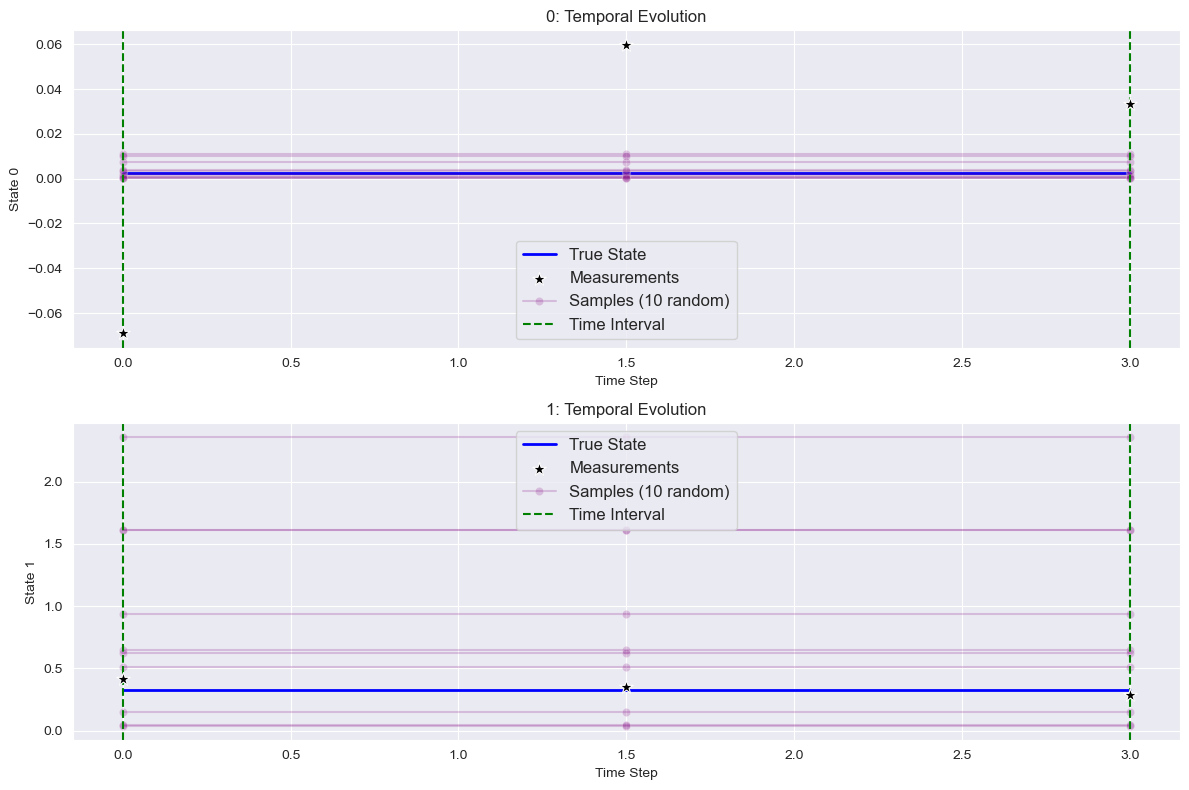

In [1]:
from pydci.examples.monomial import Monomial2D

mm2 = Monomial2D(5)

pi_in, samples = mm2.get_uniform_initial_samples(num_samples=100, scale=0.5)
res2 = mm2.forward_solve(3, samples=samples)
mm2.plot_states()

In [2]:
mm2.data[0]

,ts,shift_idx,sample_flag,lam_true_0,q_lam_true_0,q_lam_true_1,q_lam_obs_0,q_lam_obs_1
0,0.0,0,True,0.3,0.00243,0.32768,-0.069065,0.417698
1,1.5,0,True,0.3,0.00243,0.32768,0.059747,0.347021
2,3.0,0,True,0.3,0.00243,0.32768,0.033117,0.285631


In [3]:
mm2.samples[0]

,lam_0,lam_1,q_lam_0,q_lam_1,q_lam_2,q_lam_3,q_lam_4,q_lam_5
0,0.290902,1.041946,0.002083,1.228081,0.002083,1.228081,0.002083,1.228081
1,0.337404,0.800749,0.004373,0.329216,0.004373,0.329216,0.004373,0.329216
2,0.402726,1.050236,0.010594,1.277716,0.010594,1.277716,0.010594,1.277716
3,0.314904,0.685259,0.003097,0.151103,0.003097,0.151103,0.003097,0.151103
4,0.170407,0.520261,0.000144,0.038116,0.000144,0.038116,0.000144,0.038116
...,...,...,...,...,...,...,...,...
95,0.286913,0.949614,0.001944,0.772209,0.001944,0.772209,0.001944,0.772209
96,0.174143,0.918762,0.000160,0.654660,0.000160,0.654660,0.000160,0.654660
97,0.373851,0.977308,0.007303,0.891573,0.007303,0.891573,0.007303,0.891573
98,0.416120,0.754501,0.012477,0.244511,0.012477,0.244511,0.012477,0.244511


# MUD Estimate

TODO: Test for MUD Estimates

In [4]:
import matplotlib.pyplot as plt
import pydci.consistent_bayes.PCAMUDProblem as pcp
import importlib

importlib.reload(pcp)

# NOTE: do not pass in Model classes data dataframe -> This contains all timesteps of the true signal
prob = pcp.PCAMUDProblem(
    res2["samples"], res2["data"], mm2.measurement_noise, pi_in=pi_in
)
prob.state

,weight,pi_in,pi_pr,pi_obs,ratio,pi_up,q_lam_0,q_lam_1,q_lam_2,q_lam_3,q_lam_4,q_lam_5,lam_0,lam_1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.002083,1.228081,0.002083,1.228081,0.002083,1.228081,0.290902,1.041946
1,1.0,0.0,0.0,0.0,0.0,0.0,0.004373,0.329216,0.004373,0.329216,0.004373,0.329216,0.337404,0.800749
2,1.0,0.0,0.0,0.0,0.0,0.0,0.010594,1.277716,0.010594,1.277716,0.010594,1.277716,0.402726,1.050236
3,1.0,0.0,0.0,0.0,0.0,0.0,0.003097,0.151103,0.003097,0.151103,0.003097,0.151103,0.314904,0.685259
4,1.0,0.0,0.0,0.0,0.0,0.0,0.000144,0.038116,0.000144,0.038116,0.000144,0.038116,0.170407,0.520261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,0.0,0.0,0.0,0.0,0.001944,0.772209,0.001944,0.772209,0.001944,0.772209,0.286913,0.949614
96,1.0,0.0,0.0,0.0,0.0,0.0,0.000160,0.654660,0.000160,0.654660,0.000160,0.654660,0.174143,0.918762
97,1.0,0.0,0.0,0.0,0.0,0.0,0.007303,0.891573,0.007303,0.891573,0.007303,0.891573,0.373851,0.977308
98,1.0,0.0,0.0,0.0,0.0,0.0,0.012477,0.244511,0.012477,0.244511,0.012477,0.244511,0.416120,0.754501


## Both Principal Components

(<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
 ['$\\pi^{up}_{\\lambda_1}$',
  '$\\pi^{in}_{\\lambda_1}$',
  '$\\lambda^{\\dagger}_1 = 0.8000$',
  '$\\lambda^{MUD}_1 = 0.7593$'])

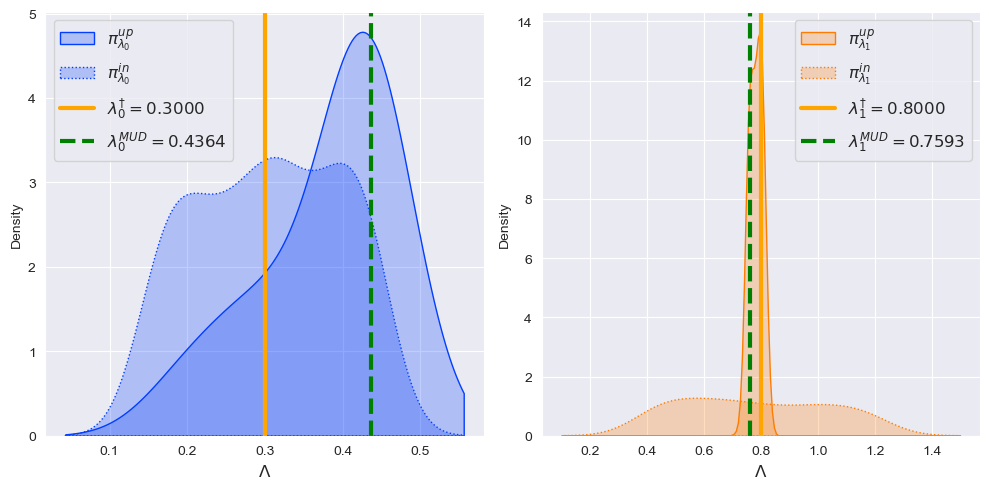

In [5]:
prob.solve(pca_components=[0, 1])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
prob.plot_L(df=prob.state, param_idx=0, ax=ax[0], lam_true=[mm2.lam_true])
prob.plot_L(df=prob.state, param_idx=1, ax=ax[1], lam_true=[mm2.lam_true])

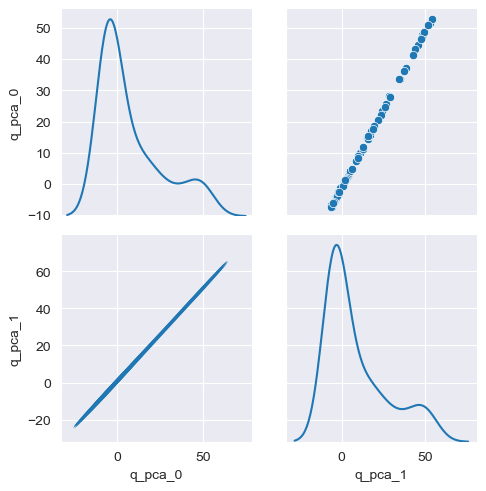

In [6]:
prob.learned_qoi_plot()

## First Principal Component Only

(<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
 ['$\\pi^{up}_{\\lambda_1}$',
  '$\\pi^{in}_{\\lambda_1}$',
  '$\\lambda^{\\dagger}_1 = 0.8000$',
  '$\\lambda^{MUD}_1 = 0.7912$'])

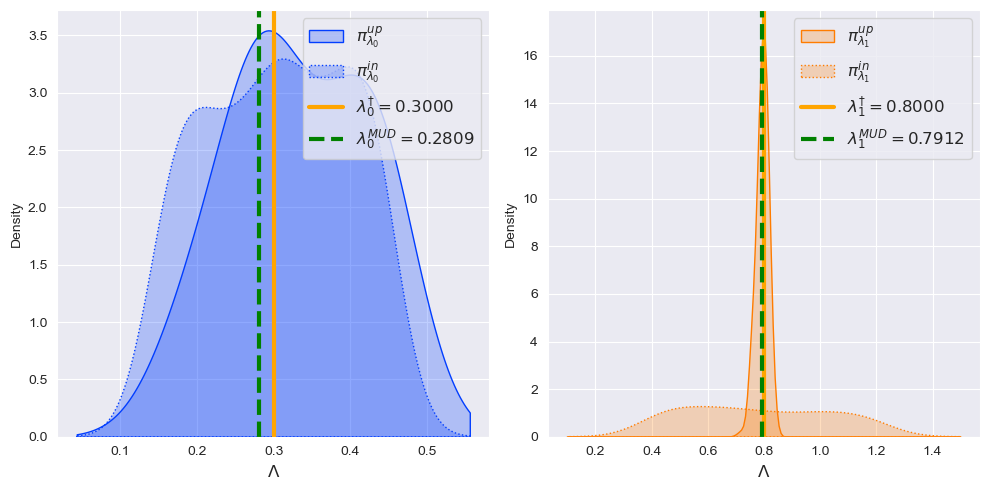

In [7]:
prob.solve(pca_components=[0])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
prob.plot_L(df=prob.state, param_idx=0, ax=ax[0], lam_true=[mm2.lam_true])
prob.plot_L(df=prob.state, param_idx=1, ax=ax[1], lam_true=[mm2.lam_true])

## Second Principal Component Only

(<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
 ['$\\pi^{up}_{\\lambda_1}$',
  '$\\pi^{in}_{\\lambda_1}$',
  '$\\lambda^{\\dagger}_1 = 0.8000$',
  '$\\lambda^{MUD}_1 = 0.7791$'])

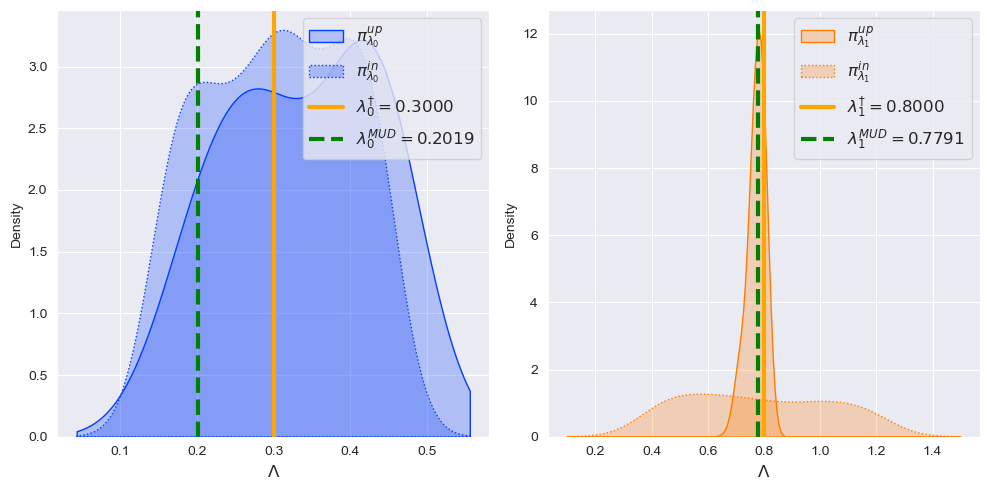

In [8]:
prob.solve(pca_components=[1])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
prob.plot_L(df=prob.state, param_idx=0, ax=ax[0], lam_true=[mm2.lam_true])
prob.plot_L(df=prob.state, param_idx=1, ax=ax[1], lam_true=[mm2.lam_true])

## First State Only

(<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
 ['$\\pi^{up}_{\\lambda_1}$',
  '$\\pi^{in}_{\\lambda_1}$',
  '$\\lambda^{\\dagger}_1 = 0.8000$',
  '$\\lambda^{MUD}_1 = 1.0767$'])

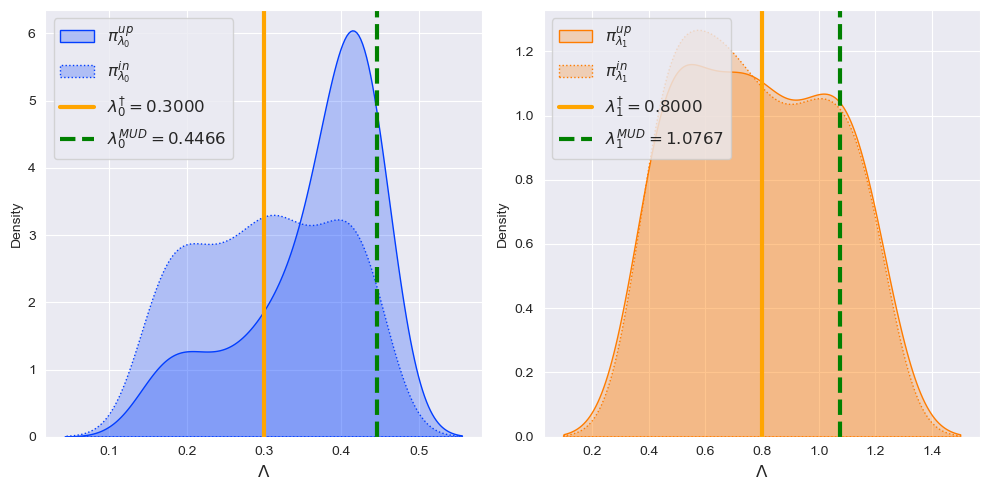

In [9]:
prob = pcp.PCAMUDProblem(
    res2["samples"], res2["data"], mm2.measurement_noise, pi_in=pi_in
)
prob.solve(pca_mask=range(0, prob.n_qoi, 2), pca_components=[0])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
prob.plot_L(df=prob.state, param_idx=0, ax=ax[0], lam_true=[mm2.lam_true])
prob.plot_L(df=prob.state, param_idx=1, ax=ax[1], lam_true=[mm2.lam_true])

## Second State Only

(<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
 ['$\\pi^{up}_{\\lambda_1}$',
  '$\\pi^{in}_{\\lambda_1}$',
  '$\\lambda^{MUD}_1 = 0.7791$'])

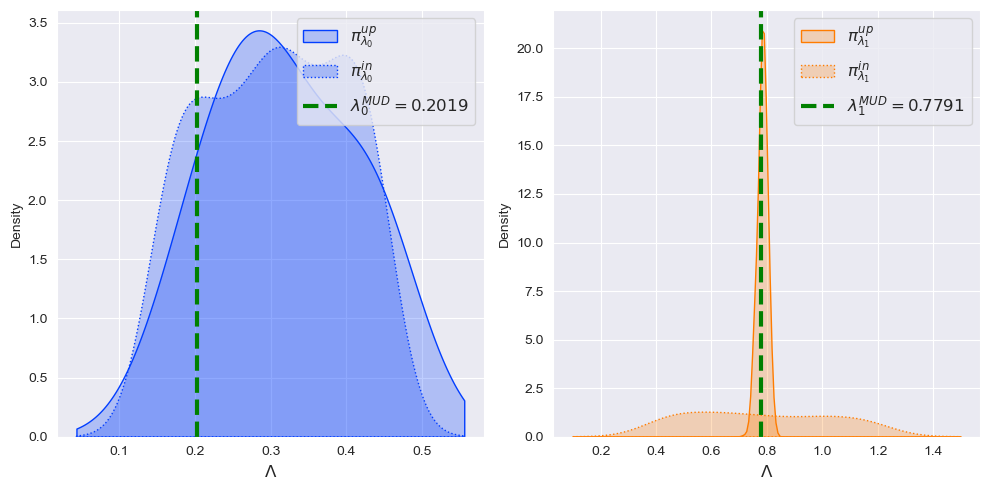

In [10]:
prob = pcp.PCAMUDProblem(
    res2["samples"], res2["data"], mm2.measurement_noise, pi_in=pi_in
)
prob.solve(pca_mask=range(1, prob.n_qoi, 2), pca_components=[0])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
prob.plot_L(df=prob.state, param_idx=0, ax=ax[0])
prob.plot_L(df=prob.state, param_idx=1, ax=ax[1])

## Iterating Over Components

(<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
 ['$\\pi^{up}_{\\lambda_1}$',
  '$\\pi^{in}_{\\lambda_1}$',
  '$\\lambda^{\\dagger}_1 = 0.8000$',
  '$\\lambda^{MUD}_1 = 0.8016$'])

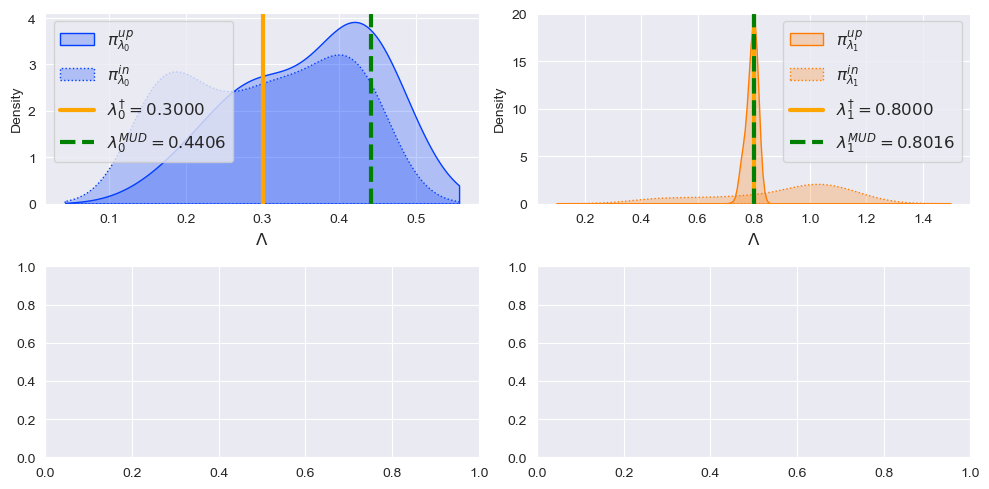

In [11]:
prob = pcp.PCAMUDProblem(
    res2["samples"], res2["data"], mm2.measurement_noise, pi_in=pi_in
)
prob.solve_it(pca_components=[[0], [1]])

fig, ax = plt.subplots(2, 2, figsize=(10, 5))


prob.plot_L(df=prob.state, param_idx=0, ax=ax[0][0], lam_true=[mm2.lam_true])
prob.plot_L(df=prob.state, param_idx=1, ax=ax[0][1], lam_true=[mm2.lam_true])

### Sub-selecting by state

Lets iterate on a PCA map of data only aggregated from 

Text(0.5, 1.0, '$\\lambda_{1}$ update using only state 1')

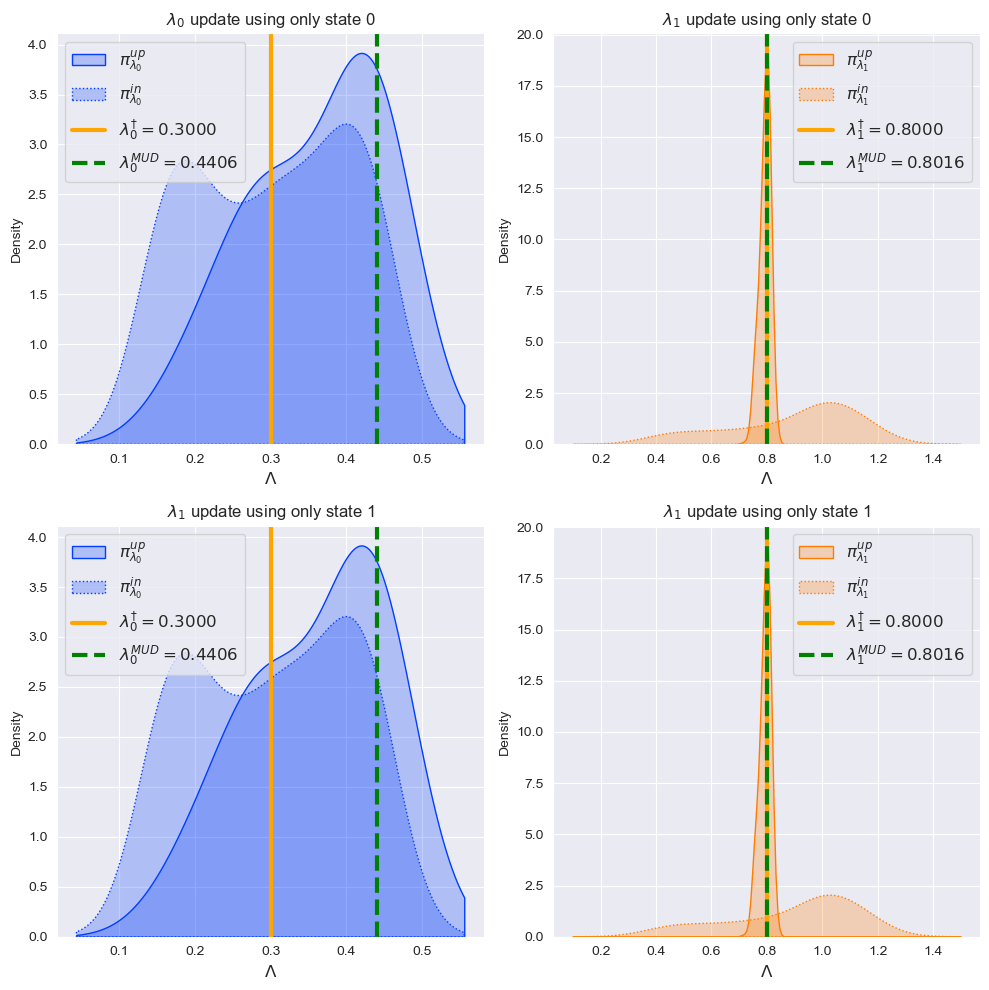

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

prob.solve(pca_mask=range(0, prob.n_qoi, 2), pca_components=[0])
prob.plot_L(df=prob.state, param_idx=0, ax=ax[0][0], lam_true=[mm2.lam_true])
ax[0][0].set_title("$\lambda_{0}$ update using only state 0")
prob.plot_L(df=prob.state, param_idx=1, ax=ax[0][1], lam_true=[mm2.lam_true])
ax[0][1].set_title("$\lambda_{1}$ update using only state 0")

prob.solve(pca_mask=range(1, prob.n_qoi, 2), pca_components=[0])
prob.plot_L(df=prob.state, param_idx=0, ax=ax[1][0], lam_true=[mm2.lam_true])
ax[1][0].set_title("$\lambda_{1}$ update using only state 1")
prob.plot_L(df=prob.state, param_idx=1, ax=ax[1][1], lam_true=[mm2.lam_true])
ax[1][1].set_title("$\lambda_{1}$ update using only state 1")

### Iterating over states

Text(0.5, 1.0, '$\\lambda_{1}$ update using only state 0')

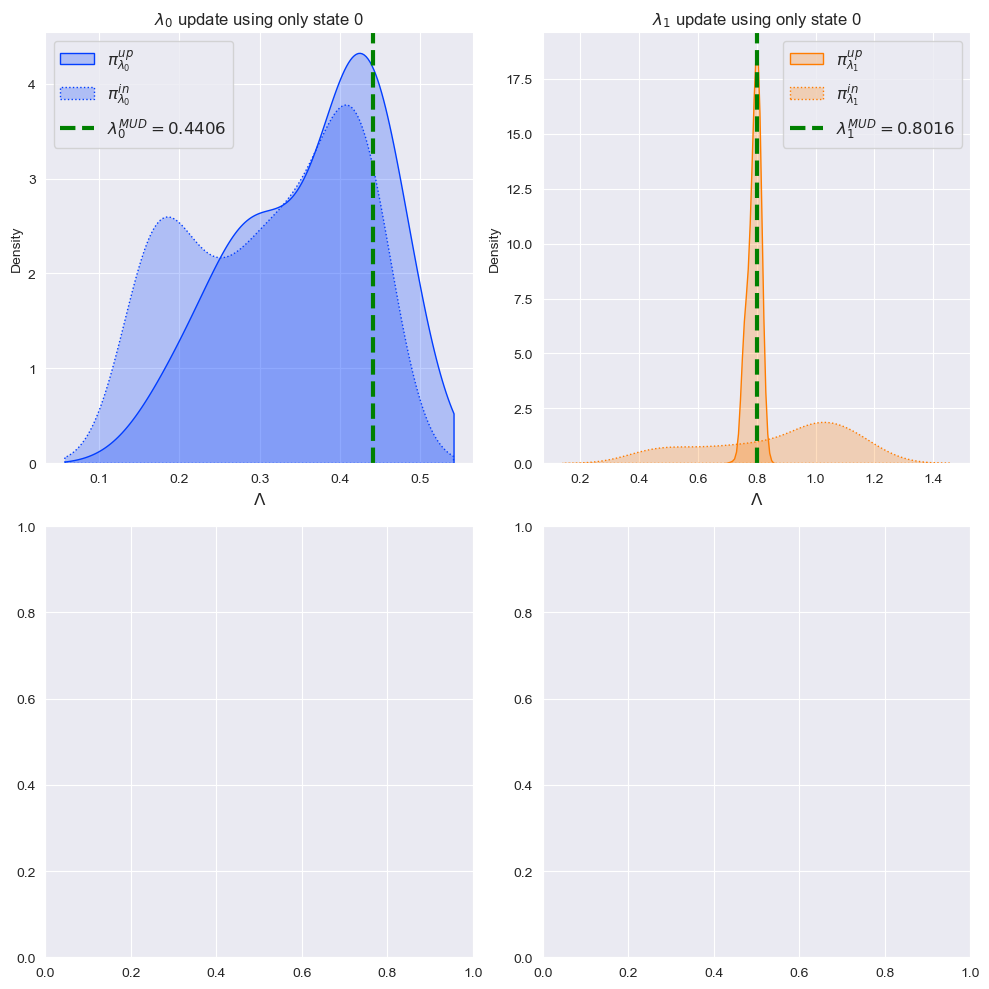

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

prob.solve_it(
    pca_splits=[range(0, prob.n_qoi, 2), range(1, prob.n_qoi, 2)], pca_components=[[0]], exp_thresh=1e30
)
prob.plot_L(df=prob.state, param_idx=0, ax=ax[0][0])
ax[0][0].set_title("$\lambda_{0}$ update using only state 0")
prob.plot_L(df=prob.state, param_idx=1, ax=ax[0][1])
ax[0][1].set_title("$\lambda_{1}$ update using only state 0")

# Estimate Methods

In [ ]:
from pydci.examples.monomial import Monomial2D

mm2 = Monomial2D(5)
mm2.estimate_params([5, 10])
mm2.plot_states()

NotImplementedError: estimate_params() base class skeleton.

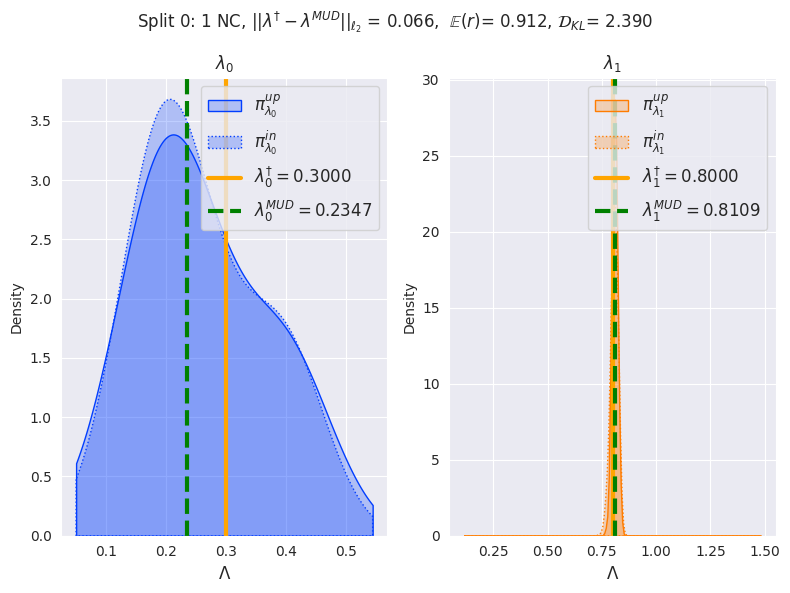

In [ ]:
mm2.probs[0].param_density_plots(lam_true=mm2.lam_true, base_size=6)

# Sequential Parameter Estimation - AKA Data Assimilation

Sequential (non-split) estimation where we can re-sample and assimilate observed data into our simulated samples between iterations.

TODO: Do this with new class that separates model and `SequentialProblem` class.

In [ ]:
from pydci.log import logger, enable_log
from pydci import SplitSequentialProblem

enable_log()

from pydci import Model
import importlib

importlib.reload(Model)
import pdb
import numpy as np
import matplotlib.pyplot as plt


class Monomial2D(Model.DynamicModel):
    def __init__(
        self,
        p,
        x0=[0, 0],  # Note in the constant monomial case, initial state won't matter
        lam_true=[0.3, 0.8],
        solve_ts=1.0,
        sample_ts=1.1,
        measurement_noise=0.05,
        **kwargs,
    ):
        self.p = p
        super().__init__(
            x0,
            lam_true,
            solve_ts=solve_ts,
            sample_ts=sample_ts,
            measurement_noise=measurement_noise,
            **kwargs,
        )

    def forward_model(
        self,
        x0,
        times,
        lam,
    ):
        """
        Monomial Forward Model

        Static in time (tim array ignored)
        """
        res = np.repeat(np.array([[lam[0] ** self.p, lam[1] ** self.p]]), 1, axis=1)
        return res

    def plot_states(
        self,
    ):
        fig, ax = plt.subplots(2, 1, figsize=(12, 8))
        for i, ax in enumerate(ax):
            self.plot_state(state_idx=i, ax=ax)
            ax.set_title(f"{i}: Temporal Evolution")


mm2 = Monomial2D(5)
lam = mm2.get_uniform_initial_samples(num_samples=100, scale=0.5)
args = mm2.forward_solve(5.0, samples=lam)


class SequentialProblem:
    def __init__(self, model):
        self.model = model
        self.probs = []

    def solve(self, time_windows, num_samples=100, diff=0.5, splits_per=1):
        pi_in = None
        samples = self.model.get_uniform_initial_samples(
            num_samples=num_samples, scale=diff
        )
        for t in time_windows:
            logger.info(f"Starting iteration from {self.model.t0} to {t}")
            args = self.model.forward_solve(t, samples=samples)
            logger.info(f"Solving inverse problem")
            prob = SplitSequentialProblem(
                args["samples"], args["data"], args["std_dev"], pi_in=pi_in
            )
            prob.solve(num_splits=splits_per)
            logger.info(f"Drawing samples from updated distribution")
            samples = prob.sample_dist(num_samples=num_samples)
            self.probs.append(prob)

[04/14/23 17:07:30] INFO     Logger initialized                                                           ]8;id=599938;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=777126;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#78\78]8;;\

                    INFO     Drawing 100 from uniform at:                                              ]8;id=775114;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=50215;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#242\242]8;;\
                                     loc: [0.15 0.4 ]                                                              
                                     scale: [0.3 0.8]                                                              

Solving model sample set: |████████████████████| 100/100 [100%] in 0.0s (37564.7


In [ ]:
mm2 = Monomial2D(5)
time_windows = [5, 10, 15]
seq_prob = SequentialProblem(mm2)

seq_prob.solve(time_windows)

                    INFO     Drawing 100 from uniform at:                                              ]8;id=251698;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=924042;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#242\242]8;;\
                                     loc: [0.15 0.4 ]                                                              
                                     scale: [0.3 0.8]                                                              

                    INFO     Starting iteration from 0.0 to 5                                      ]8;id=638334;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=632493;file:///tmp/ipykernel_1785648/4009830505.py#76\76]8;;\

Solving model sample set: |████████████████████| 100/100 [100%] in 0.0s (34279.0


                    INFO     Solving inverse problem                                               ]8;id=172052;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=191165;file:///tmp/ipykernel_1785648/4009830505.py#78\78]8;;\

                    INFO     Starting sequential algorithm with 1                     ]8;id=48128;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=637710;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#191\191]8;;\

                    INFO     Re-initializing problem with split #0                    ]8;id=45045;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=911787;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#193\193]8;;\

                    INFO     all: Trying 1 qoi combs.                                 ]8;id=989953;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=860151;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#207\207]8;;\

                    INFO     Trying comb of size 10: 1111111111                       ]8;id=1751;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=282681;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#210\210]8;;\

                    INFO     Solving using 1 components                                        ]8;id=773283;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=613539;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=99443;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=192294;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=348458;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=412705;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=538505;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=811687;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=322054;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=573675;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=932305;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=268934;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 1 components                                        ]8;id=540288;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=956727;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=774955;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=489960;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=529432;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=193792;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=939615;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=961710;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=935558;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=480926;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Drawing samples from updated distribution                             ]8;id=588109;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=229441;file:///tmp/ipykernel_1785648/4009830505.py#81\81]8;;\

                    INFO     Starting iteration from 5.0 to 10                                     ]8;id=448496;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=351776;file:///tmp/ipykernel_1785648/4009830505.py#76\76]8;;\

Solving model sample set: |████████████████████| 100/100 [100%] in 0.0s (52740.2


                    INFO     Solving inverse problem                                               ]8;id=427782;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=904155;file:///tmp/ipykernel_1785648/4009830505.py#78\78]8;;\

                    INFO     Starting sequential algorithm with 1                     ]8;id=496446;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=388746;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#191\191]8;;\

                    INFO     Re-initializing problem with split #0                    ]8;id=769149;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=622031;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#193\193]8;;\

                    INFO     all: Trying 1 qoi combs.                                 ]8;id=275362;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=604733;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#207\207]8;;\

                    INFO     Trying comb of size 10: 1111111111                       ]8;id=130143;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=404692;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#210\210]8;;\

                    INFO     Solving using 1 components                                        ]8;id=618482;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=946105;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=562655;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=907678;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=786857;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=955923;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=615813;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=413153;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=841445;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=201406;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=620106;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=993753;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 1 components                                        ]8;id=125078;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=525501;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=9879;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=650475;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=36221;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=899227;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=516401;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=802956;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=173292;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=289097;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Drawing samples from updated distribution                             ]8;id=112838;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=965282;file:///tmp/ipykernel_1785648/4009830505.py#81\81]8;;\

                    INFO     Starting iteration from 10.0 to 15                                    ]8;id=298845;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=161876;file:///tmp/ipykernel_1785648/4009830505.py#76\76]8;;\

Solving model sample set: |████████████████████| 100/100 [100%] in 0.0s (23655.9


                    INFO     Solving inverse problem                                               ]8;id=180504;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=886565;file:///tmp/ipykernel_1785648/4009830505.py#78\78]8;;\

                    INFO     Starting sequential algorithm with 1                     ]8;id=611545;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=366567;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#191\191]8;;\

                    INFO     Re-initializing problem with split #0                    ]8;id=520467;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=331334;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#193\193]8;;\

                    INFO     all: Trying 1 qoi combs.                                 ]8;id=590447;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=588155;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#207\207]8;;\

                    INFO     Trying comb of size 10: 1111111111                       ]8;id=307322;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=554865;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#210\210]8;;\

                    INFO     Solving using 1 components                                        ]8;id=964650;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=264950;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                            ]8;id=430956;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=695623;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#189\189]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=237316;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=779013;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=972782;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=24624;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=556892;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=634619;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=559934;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=4786;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 1 components                                        ]8;id=912412;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=438574;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=715493;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=575935;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=445034;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=3859;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#213\213]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=404453;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=667018;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=624012;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=425478;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Drawing samples from updated distribution                             ]8;id=215105;file:///tmp/ipykernel_1785648/4009830505.py\4009830505.py]8;;\:]8;id=570102;file:///tmp/ipykernel_1785648/4009830505.py#81\81]8;;\